In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [50]:
def display_img_arr(img_arr, r, c, dim,titles_arr):
    fl = 0
    fig = plt.figure(figsize = dim)
    for i in range(r):
        for j in range(c):
            if len(img_arr) == fl:
                break
            ax1 = fig.add_subplot(r, c, fl + 1)
            ax1.set_title(titles_arr[fl], fontsize = 20)
            ax1.imshow(img_arr[fl], cmap = 'gray')
            fl = fl + 1
    plt.show()

In [51]:
def match(img, SE):
    rows = img.shape[0]
    cols = img.shape[1]
    for i in range(rows):
        for j in range(cols):
            im_cur = img[i][j]
            if SE[i][j] == im_cur:
                continue
            if SE[i][j] == -1:
                continue
            return 0
    return 1

In [52]:
def skeletonize(img, SE):
    output_img = img.copy()
    rows = img.shape[0]
    cols = img.shape[1]
    m = SE.shape[0]
    n = SE.shape[1]
    
    for i in range(rows):
        for j in range(cols):
            if (i - int( m/ 2)) >= 0 and (i + int(m / 2)) < rows and (j - int(n / 2)) >= 0 and (j + int(n / 2)) < cols:
                img_slice = img[i - int(m / 2): i + int(m / 2) + 1, j - int(n / 2): j + int(n / 2) + 1]
                if match(img_slice, SE) == 1:
                    output_img[i][j] = 0
    return output_img

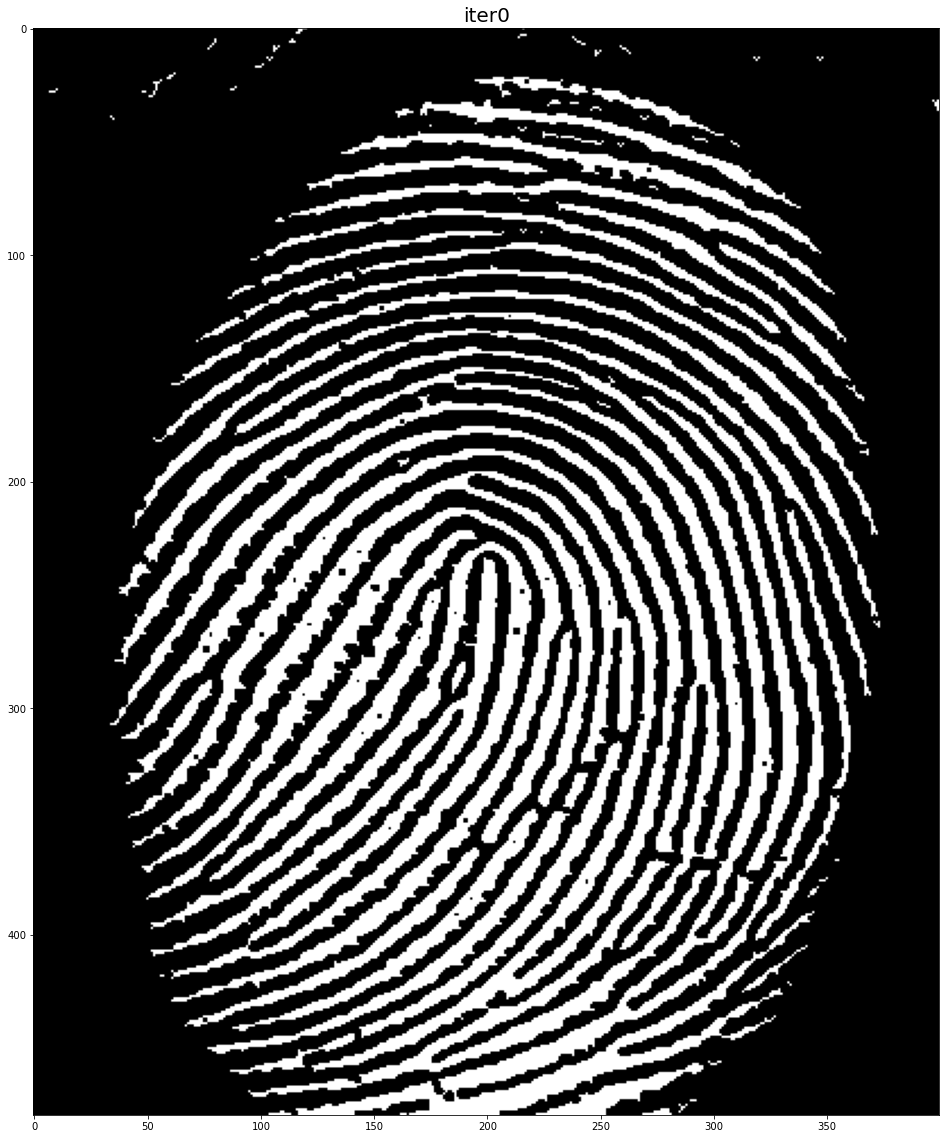

at iter 0 error 0.10381770833333333
at iter 1 error 0.09591145833333334
at iter 2 error 0.06761979166666666
at iter 3 error 0.035203125
at iter 4 error 0.011630208333333333


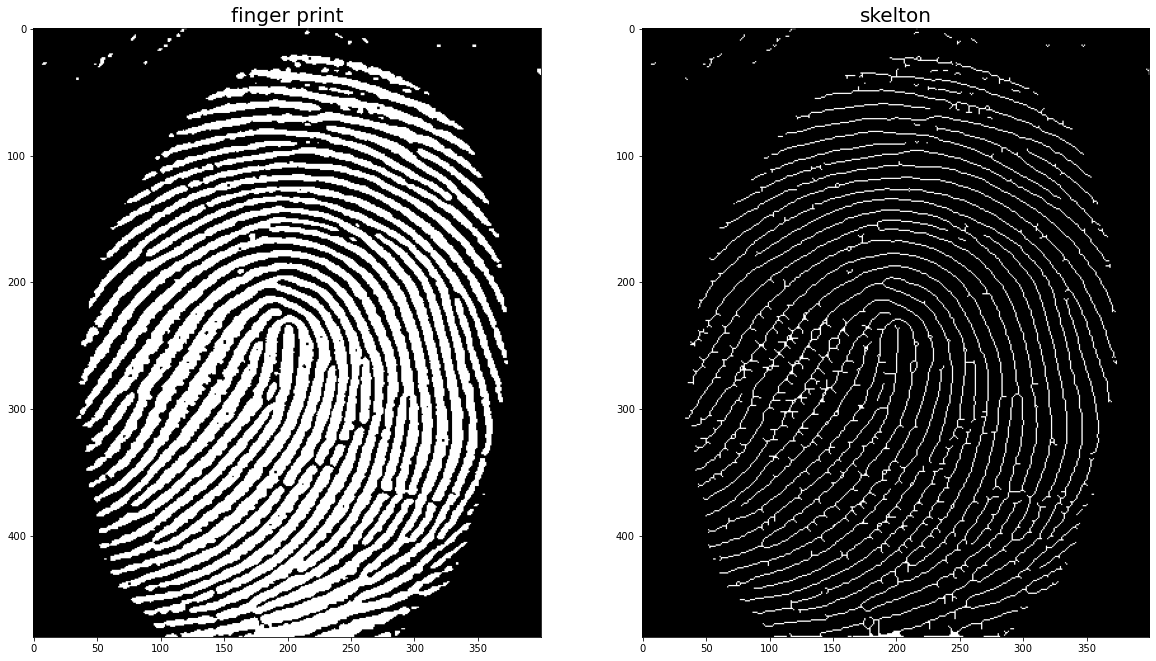

In [53]:
def skeletonization(img,S1,S2,thresh):
    prev = img
    itrs = 0
    
    while itrs<100:
        for i in range(4):
            img = skeletonize(skeletonize(img, S1), S2)
            S1 = np.rot90(S1)
            S2 = np.rot90(S2)
        delta = np.abs(prev - img)    
        delta = np.mean(delta)
        if delta < thresh:
            break
        else:
            if(itrs%20==0 and i!=0):
                display_img_arr([img], 1, 1, (20, 20), ['iter'+str(itrs)])
            print('at iter',itrs,'error',delta)
        prev = img
        itrs += 1
    return img

SE1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
SE2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])

img = cv2.imread('images/thumb_print.jpg', cv2.IMREAD_GRAYSCALE)

img = (img < 127).astype(np.uint8)
images = []
images.append(img)
ske_img = skeletonization(img,SE1,SE2,0.01)
images.append(ske_img)
display_img_arr(images, 1, 2, (20, 20), ['finger print','skelton'])


### Part 2
- Role of S1 is to detect edges and curve like edges
- Role of S2 is to detect right angles

### Part 3
- Rotating the structural elements are necessary to detect horizontal as well as vertical edges, curves
- As number of passes increase, we get more finer looking skeleton of the image

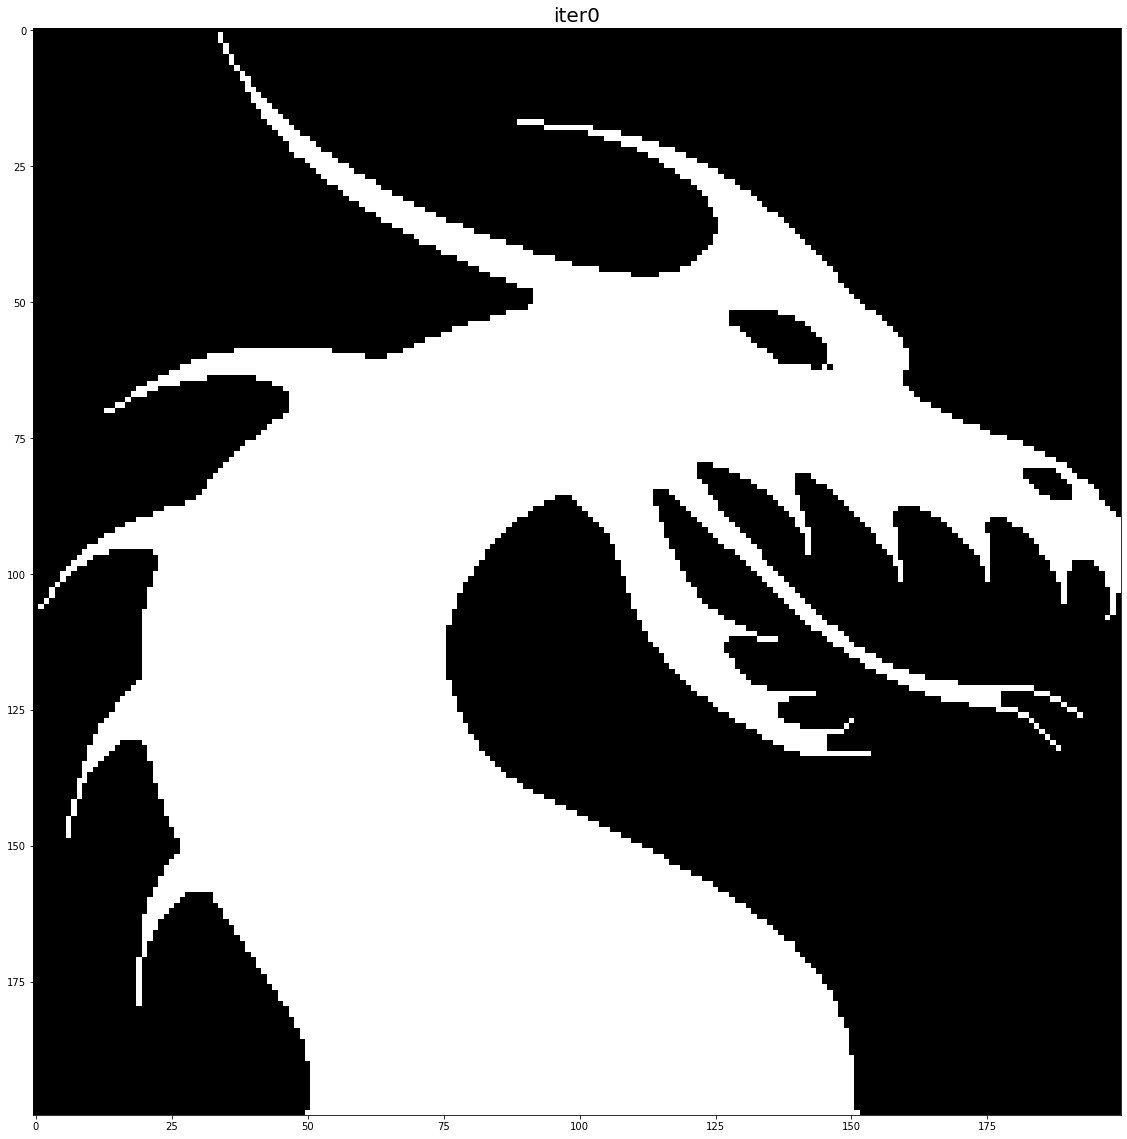

at iter 0 error 0.03135
at iter 1 error 0.02765
at iter 2 error 0.023475
at iter 3 error 0.0197
at iter 4 error 0.017225
at iter 5 error 0.016575
at iter 6 error 0.015075
at iter 7 error 0.0136
at iter 8 error 0.0127
at iter 9 error 0.011725
at iter 10 error 0.011275
at iter 11 error 0.01055
at iter 12 error 0.010275
at iter 13 error 0.010125
at iter 14 error 0.00955
at iter 15 error 0.0093
at iter 16 error 0.009175
at iter 17 error 0.0089
at iter 18 error 0.008875
at iter 19 error 0.008675


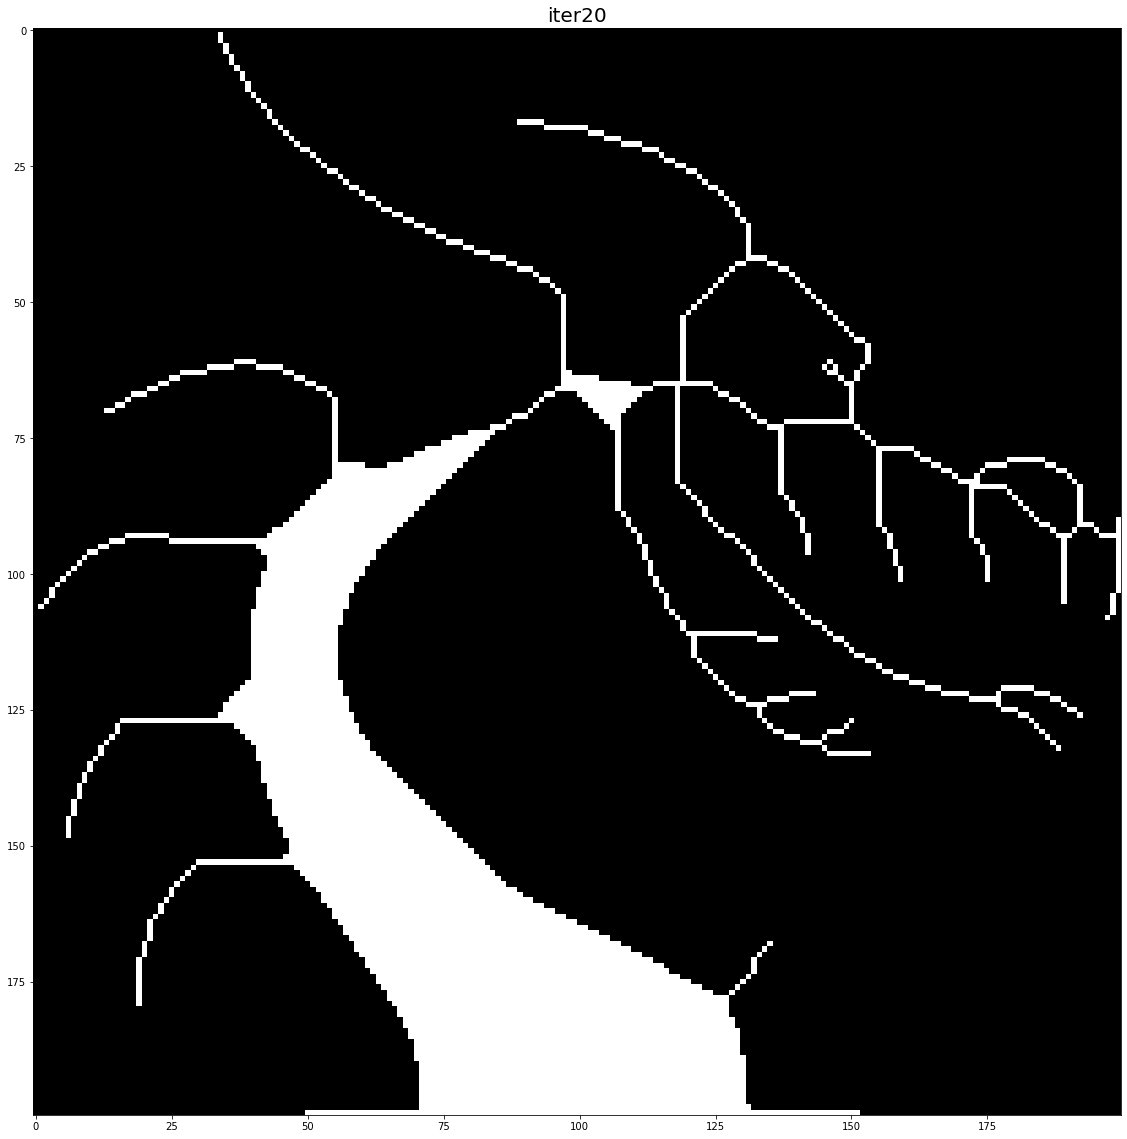

at iter 20 error 0.00815
at iter 21 error 0.007775
at iter 22 error 0.00745
at iter 23 error 0.007125
at iter 24 error 0.00665
at iter 25 error 0.006475
at iter 26 error 0.00625
at iter 27 error 0.006025
at iter 28 error 0.0057
at iter 29 error 0.00495
at iter 30 error 0.0045
at iter 31 error 0.004075
at iter 32 error 0.0035
at iter 33 error 0.0033
at iter 34 error 0.003175
at iter 35 error 0.002975
at iter 36 error 0.00275
at iter 37 error 0.0026
at iter 38 error 0.0025
at iter 39 error 0.00205


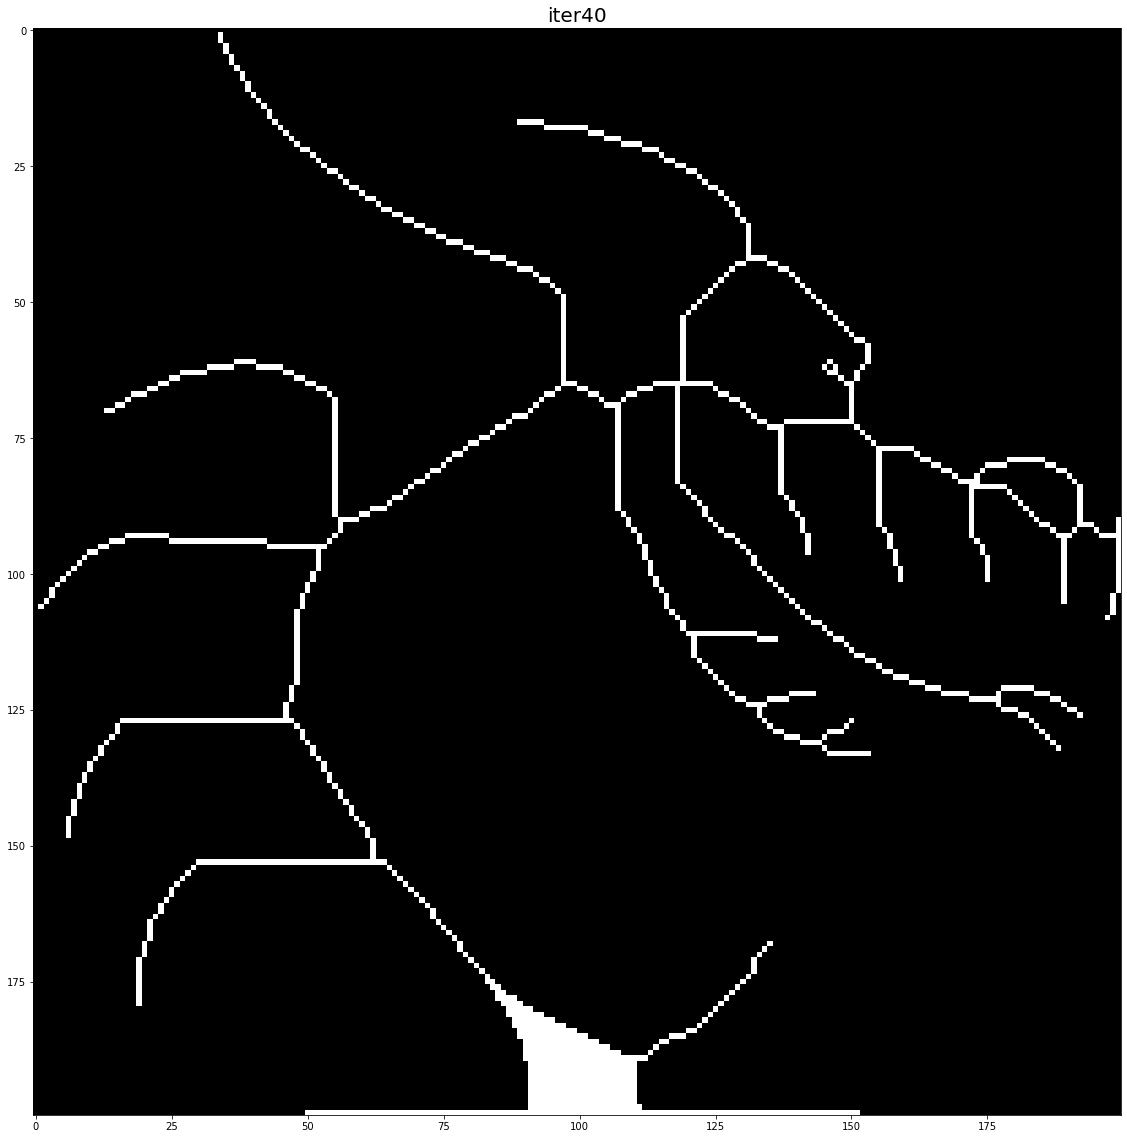

at iter 40 error 0.001675
at iter 41 error 0.0014
at iter 42 error 0.00115
at iter 43 error 0.001025


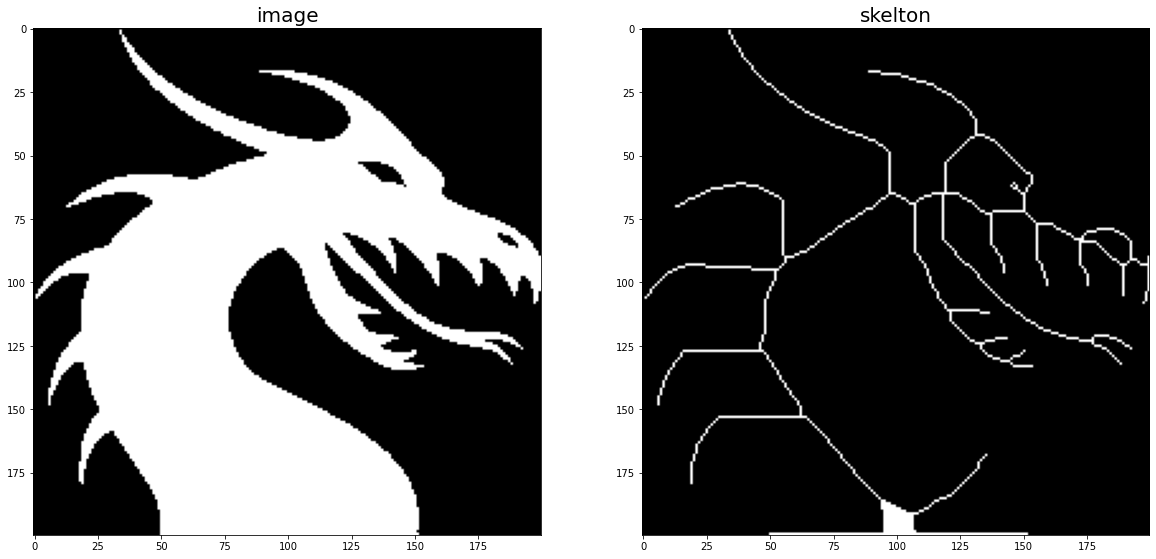

In [54]:
SE1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
SE2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])

img = cv2.imread('images/dragon.png', 0)
img = 255- img
img=cv2.resize(img,(200,200))
img = (img < 127).astype(np.uint8)
images = []
images.append(img)
ske_img = skeletonization(img,SE1,SE2,0.001)
images.append(ske_img)
display_img_arr(images, 1, 2, (20, 20), ['image','skelton'])

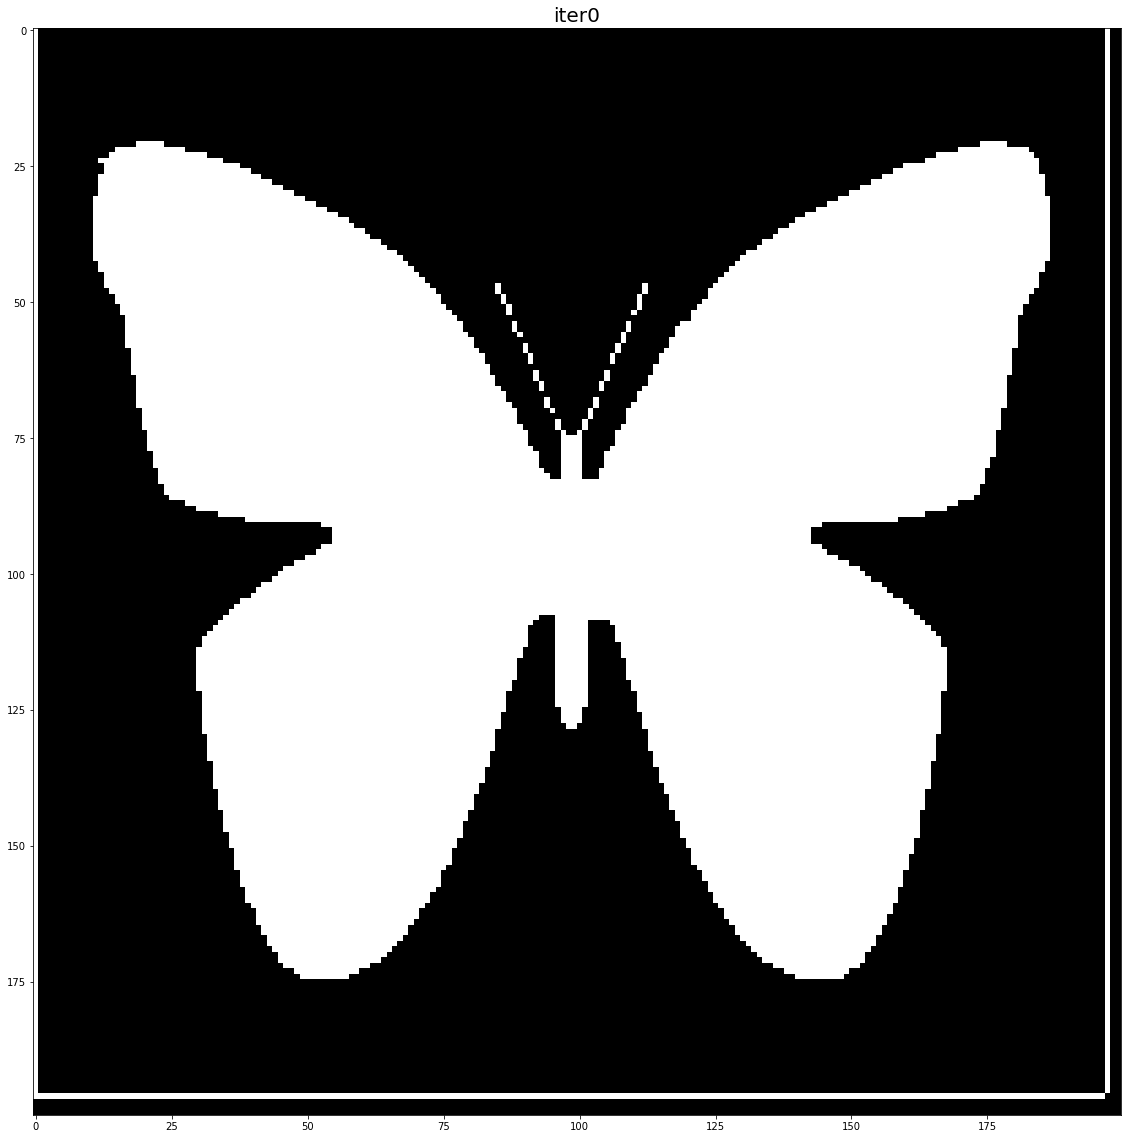

at iter 0 error 0.01905
at iter 1 error 0.019075
at iter 2 error 0.0188
at iter 3 error 0.01815
at iter 4 error 0.01745
at iter 5 error 0.017325
at iter 6 error 0.01725
at iter 7 error 0.01685
at iter 8 error 0.01675
at iter 9 error 0.016525
at iter 10 error 0.016275
at iter 11 error 0.01595
at iter 12 error 0.01585
at iter 13 error 0.015325
at iter 14 error 0.014875
at iter 15 error 0.0143
at iter 16 error 0.0141
at iter 17 error 0.013625
at iter 18 error 0.01335
at iter 19 error 0.012725


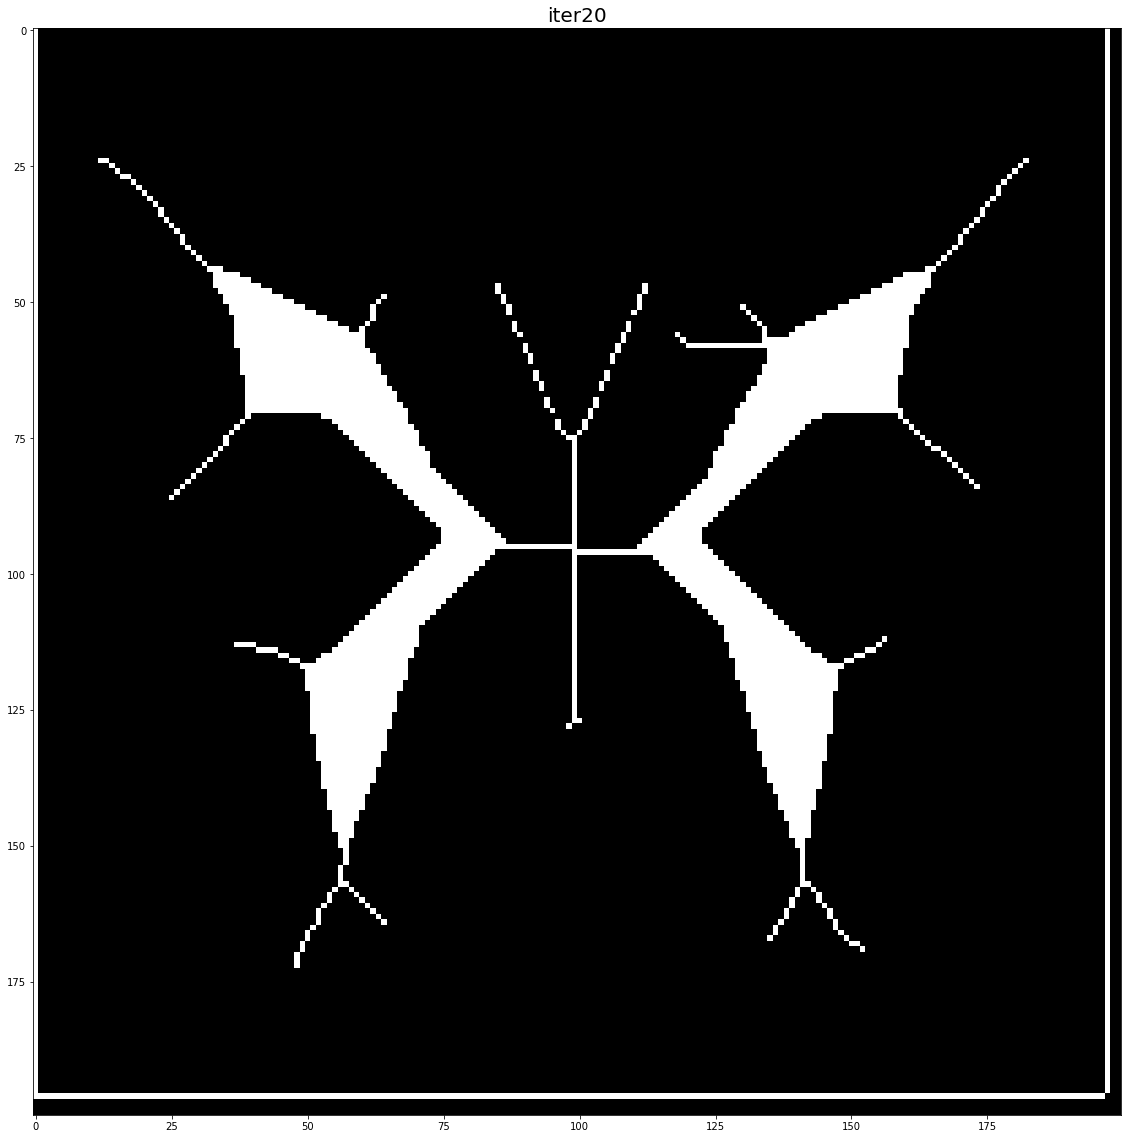

at iter 20 error 0.012375
at iter 21 error 0.0118
at iter 22 error 0.01125
at iter 23 error 0.010625
at iter 24 error 0.009975
at iter 25 error 0.0082
at iter 26 error 0.006225
at iter 27 error 0.0041
at iter 28 error 0.00265
at iter 29 error 0.001225


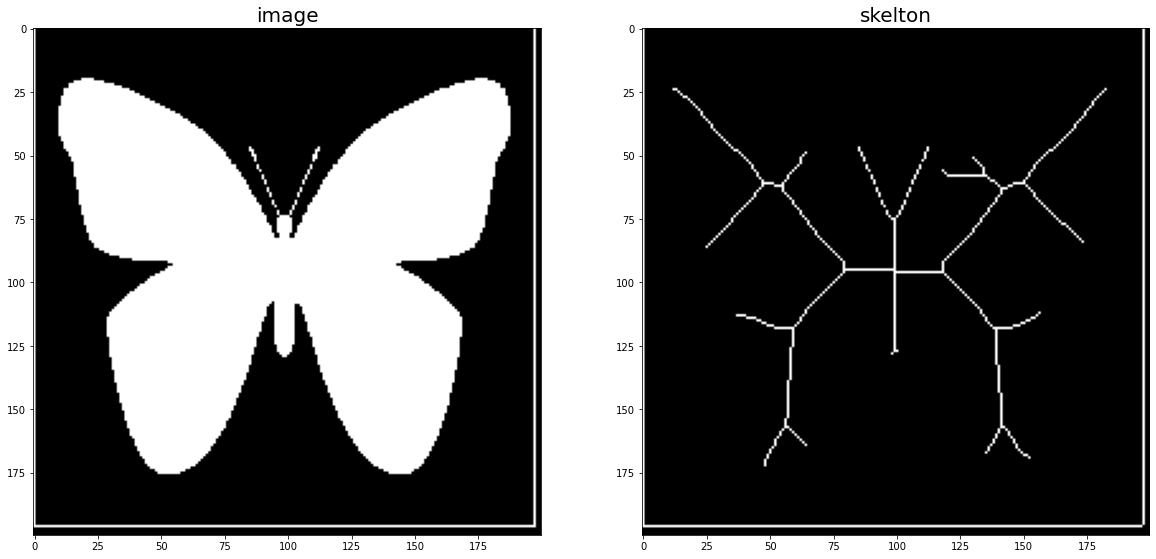

In [57]:
img = cv2.imread('images/butterfly.jpg', 0)
img = 255- img
img=cv2.resize(img,(200,200))
img = (img < 127).astype(np.uint8)
images = []
images.append(img)
ske_img = skeletonization(img,SE1,SE2,0.001)
images.append(ske_img)
display_img_arr(images, 1, 2, (20, 20), ['image','skelton'])

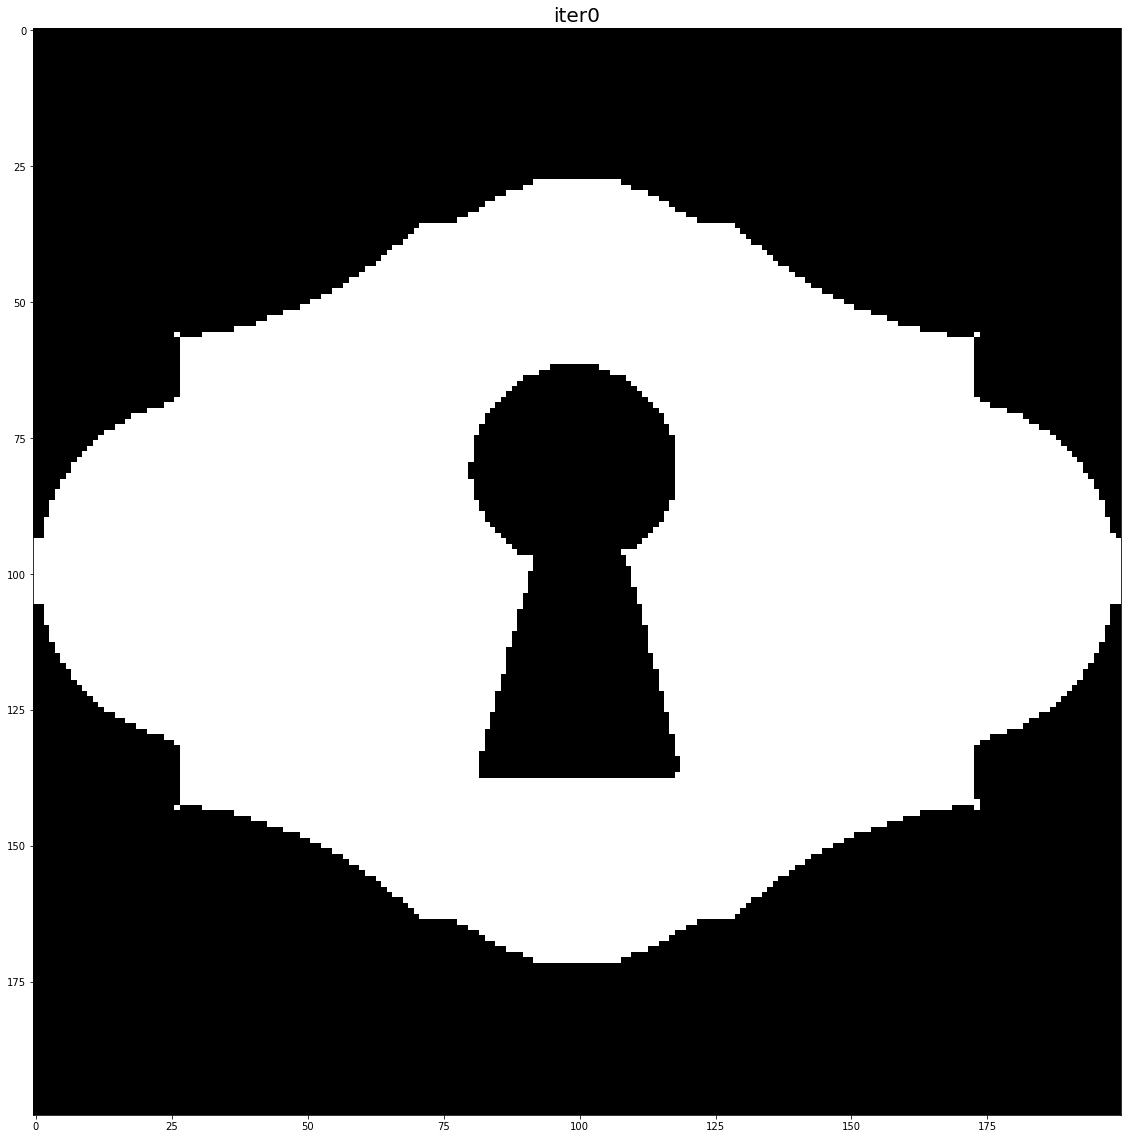

at iter 0 error 0.016375
at iter 1 error 0.016575
at iter 2 error 0.016525
at iter 3 error 0.01645
at iter 4 error 0.0166
at iter 5 error 0.0167
at iter 6 error 0.016625
at iter 7 error 0.0166
at iter 8 error 0.016375
at iter 9 error 0.01605
at iter 10 error 0.0163
at iter 11 error 0.01605
at iter 12 error 0.015725
at iter 13 error 0.015975
at iter 14 error 0.015825
at iter 15 error 0.01535
at iter 16 error 0.014575
at iter 17 error 0.0132
at iter 18 error 0.011975
at iter 19 error 0.01055


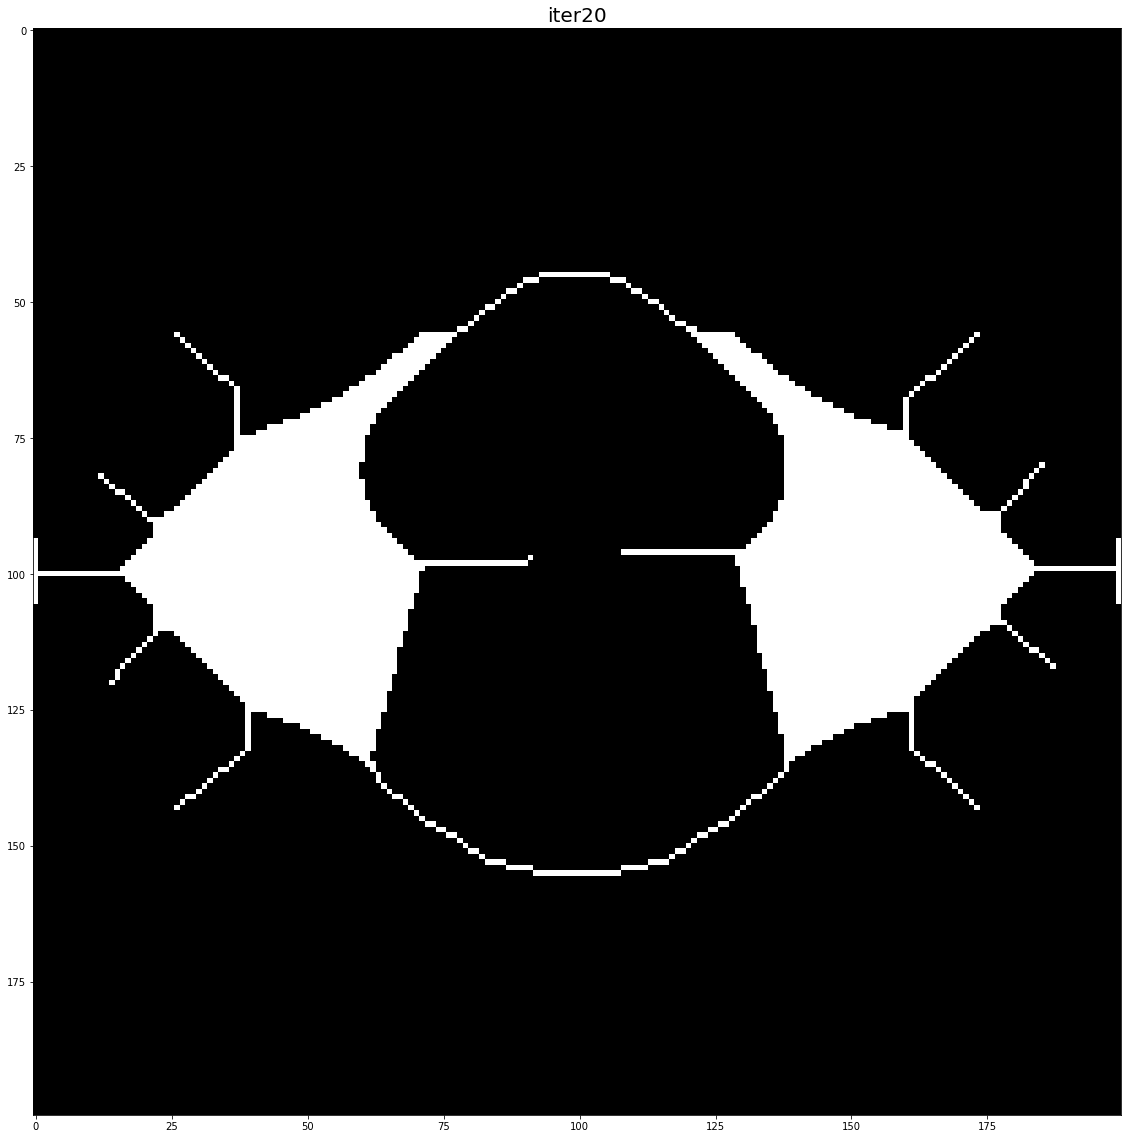

at iter 20 error 0.009775
at iter 21 error 0.009125
at iter 22 error 0.00875
at iter 23 error 0.00805
at iter 24 error 0.00755
at iter 25 error 0.006525
at iter 26 error 0.00615
at iter 27 error 0.005625
at iter 28 error 0.005375
at iter 29 error 0.004925
at iter 30 error 0.00475
at iter 31 error 0.00425
at iter 32 error 0.004075
at iter 33 error 0.003625
at iter 34 error 0.003425
at iter 35 error 0.00305
at iter 36 error 0.002975
at iter 37 error 0.002675
at iter 38 error 0.002375
at iter 39 error 0.0021


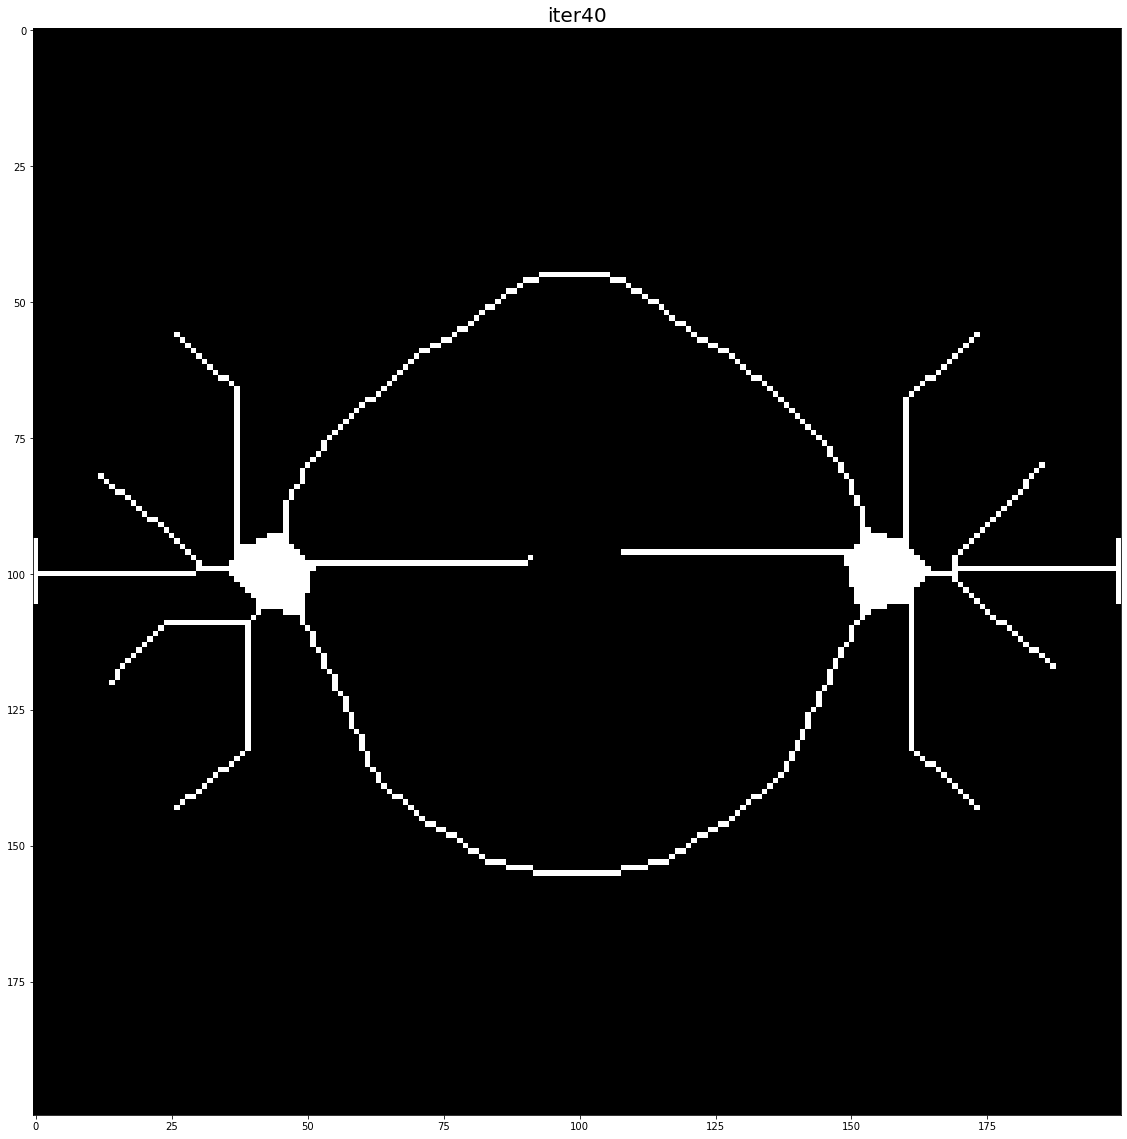

at iter 40 error 0.001875
at iter 41 error 0.00155
at iter 42 error 0.00135
at iter 43 error 0.001125
at iter 44 error 0.001025
at iter 45 error 0.000725


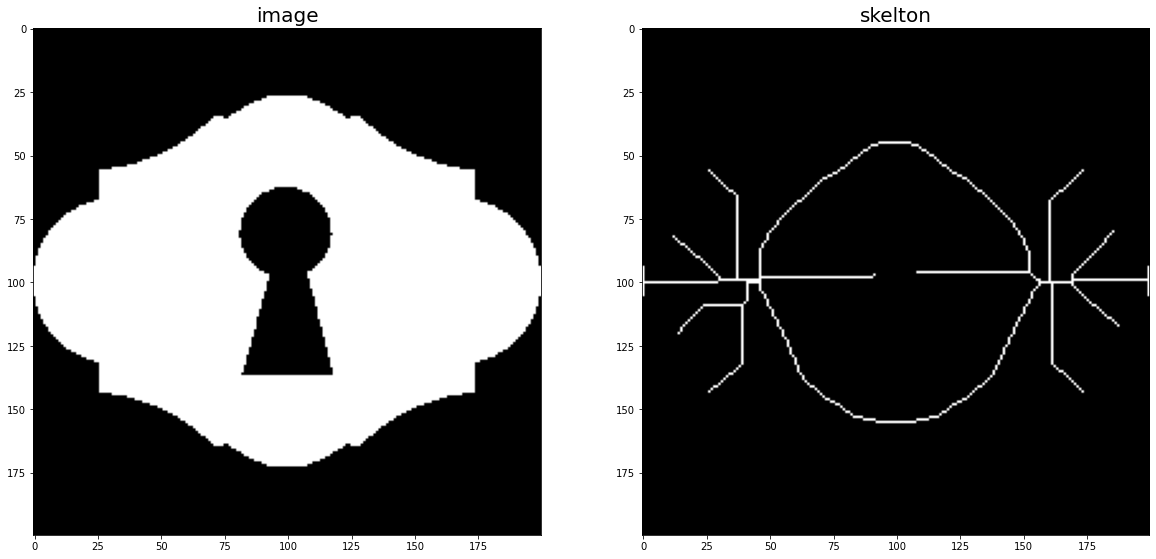

In [56]:
img = cv2.imread('images/keyhole.jpg', 0)
img = 255 - img
img=cv2.resize(img,(200,200))
img = (img < 127).astype(np.uint8)
images = []
images.append(img)
ske_img = skeletonization(img,SE1,SE2,0.0005)
images.append(ske_img)
display_img_arr(images, 1, 2, (20, 20), ['image','skelton'])